In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Configure plot display attributes

In [2]:
# Configure matplotlib

%matplotlib inline
color_baseline = '#1F77B4' #baseline
hatch_baseline = '\\'
color_optimized1 = '#FF7F0E' #optimized 1
hatch_optimized1 = '.'
color_optimized2 = '#2CA02C' #optimized 2
hatch_optimized2 = '*'
color_npbench_CPU = '#D62728' #NPBench_CPU
hatch_npbench_CPU = '-'
color_npbench_GPU = '#9467BD' #NPBench_GPU
hatch_npbench_GPU = 'o'

# tick_spacing = 50

GRAPH_VALUE_MARKING = 12
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

# plt.rc('font', family='Times New Roman') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

annotation_offset = 0

## Azimint

### Roofline

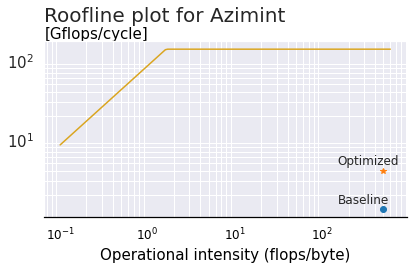

In [3]:
# Data points
kernel_name = 'Azimint'
#peak performance [GFLOPS]
peak_perf = 138.65 # flops per cycle
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline, 'o'],  # computational intensity, performance
          [500.38, 3.94, color_optimized1, '*']]

kernel_names = ['Baseline', 'Optimized']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.1,600,0.1)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 350, kernel[0][1] + 0.25), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 350, kernel[1][1] + 1), fontsize = 12)

## Roofline settings #########################################################################

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.29, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

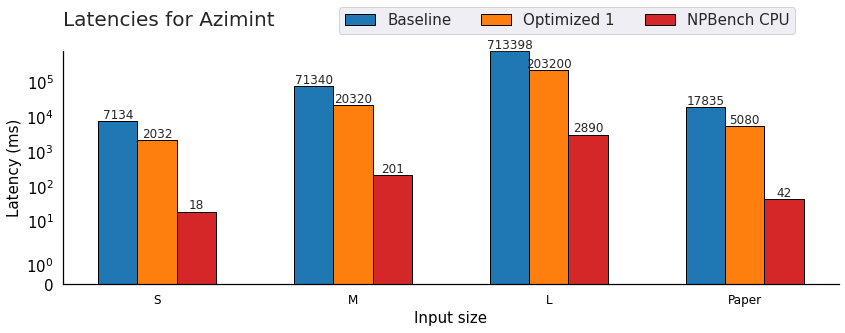

In [4]:
# Data points ####################################################################################

kernel_name = 'Azimint'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([7134,71340,713398,17835])
optimized_1 = np.array([2032,20320,203200,5080])
npbench_cpu = np.array([18,201,2890,42])

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.0f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

## PLOT settings #########################################################################

ax1.set_title('Latencies for {}'.format(kernel_name), loc='left', pad = 25)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)

plt.legend(ncol = 3, loc='upper center', bbox_to_anchor=(0.65, 1.22))
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.png'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Conv2D

### Roofline

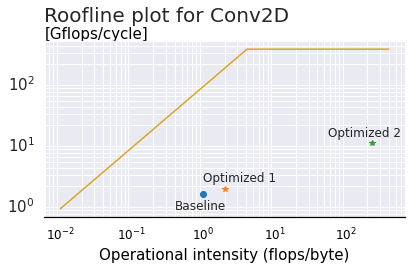

In [5]:
# Data points
kernel_name = 'Conv2D'
#peak performance [GFLOPS]
peak_perf = 348.98
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[1, 1.46, color_baseline, 'o'], 
          [2, 1.8, color_optimized1, '*'], 
          [231.36206, 10.25, color_optimized2, '*']]

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,400,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 0.6, kernel[0][1] - 0.6), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 1, kernel[1][1] + 0.6), fontsize = 12)
ax.annotate(kernel_names[2], xy = (kernel[2][0] - 175, kernel[2][1] + 3), fontsize = 12)

## Roofline settings #########################################################################

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.29, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

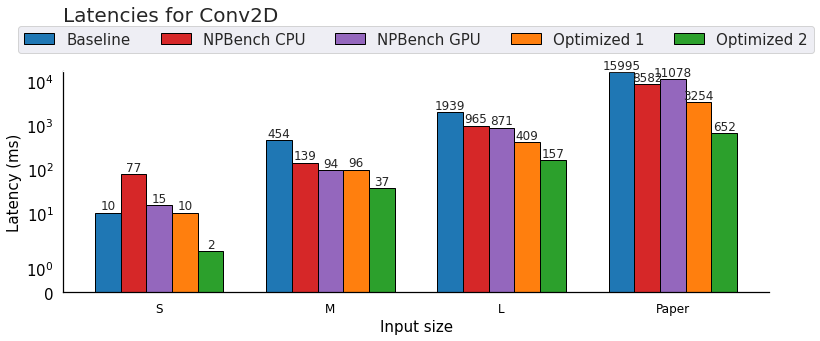

In [6]:
# Data points ####################################################################################

kernel_name = 'Conv2D'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([10.11,454,1939,15995])
optimized_1 = np.array([10,95.7,409,3254])
optimized_2 = np.array([1.679,36.774,157,652])
npbench_cpu = np.array([77,139,965,8582])
npbench_gpu = np.array([15,94,871,11078])

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.15

rects3 = ax1.bar(input_size_xaxis_ticks - 2*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks - bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

rects5 = ax1.bar(input_size_xaxis_ticks, npbench_gpu, width= bar_width, color=color_npbench_GPU,
       label="NPBench GPU", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks + bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + 2*bar_width, optimized_2, width= bar_width, color=color_optimized2,
       label="Optimized 2", edgecolor = 'black')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.0f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

## PLOT settings #########################################################################

ax1.set_title('Latencies for {}'.format(kernel_name), loc='left', pad = 50)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)

plt.legend(ncol = 5, loc='upper center', bbox_to_anchor=(0.5, 1.24))
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.png'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Durbin

### Roofline

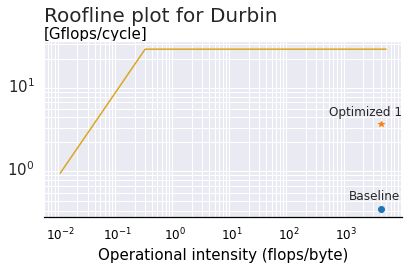

In [7]:
# Data points
kernel_name = 'Durbin'
#peak performance [GFLOPS]
peak_perf = 26.04
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[4001, 0.32, color_baseline, 'o'], 
          [4001, 3.33, color_optimized1, '*']] 

kernel_names = ['Baseline', 'Optimized 1']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,5000,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 2900, kernel[0][1] + 0.1), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 3500, kernel[1][1] + 0.9), fontsize = 12)

## Roofline settings #########################################################################

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.29, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

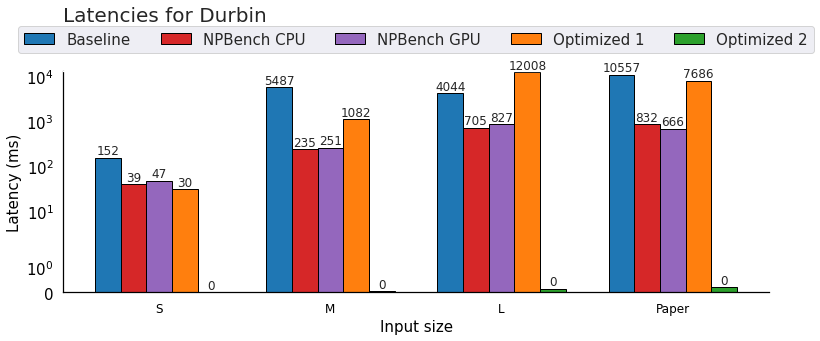

In [8]:
# Data points ####################################################################################

kernel_name = 'Durbin'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([152,5487,4044,10557])
optimized_1 = np.array([30,1082,12008,7686])
optimized_2 = np.array([0.00446,0.06306,0.149,0.226])
npbench_cpu = np.array([39,235,705,832])
npbench_gpu = np.array([47,251,827,666])

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.15

rects3 = ax1.bar(input_size_xaxis_ticks - 2*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks - bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

rects5 = ax1.bar(input_size_xaxis_ticks, npbench_gpu, width= bar_width, color=color_npbench_GPU,
       label="NPBench GPU", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks + 1*bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + 2*bar_width, optimized_2, width= bar_width, color=color_optimized2,
       label="Optimized 2", edgecolor = 'black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.0f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

## PLOT settings #########################################################################

ax1.set_title('Latencies for {}'.format(kernel_name), loc='left', pad = 50)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)

plt.legend(ncol = 5, loc='upper center', bbox_to_anchor=(0.5, 1.24))
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.png'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Gramschmidt

### Roofline

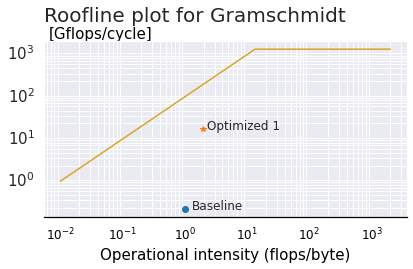

In [9]:
# Data points
kernel_name = 'Gramschmidt'
#peak performance [GFLOPS]
peak_perf = 1137
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[1, 0.19, color_baseline, 'o'], 
          [1.98312, 14.67, color_optimized1, '*']]

kernel_names = ['Baseline', 'Optimized 1']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,2000,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] + 0.3, kernel[0][1] + 0), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] + 0.3, kernel[1][1] + 0), fontsize = 12)

## Roofline settings #########################################################################
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.3, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

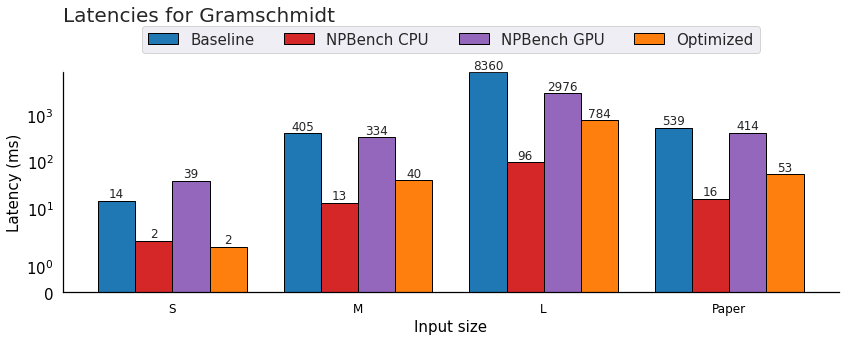

In [10]:
# Data points ####################################################################################

kernel_name = 'Gramschmidt'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([14.325,405,8359.7,539])
optimized_1 = np.array([1.749,40,783.78,53.4])
npbench_cpu = np.array([2,13,96,16])
npbench_gpu = np.array([39,334,2976,414])

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - 1.5*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks - 0.5*bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks + 0.5*bar_width, npbench_gpu, width= bar_width, color=color_npbench_GPU,
       label="NPBench GPU", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks + 1.5*bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized", edgecolor = 'black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.0f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

## PLOT settings #########################################################################

ax1.set_title('Latencies for {}'.format(kernel_name), loc='left', pad = 50)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)

plt.legend(ncol = 4, loc='upper center', bbox_to_anchor=(0.5, 1.24))
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.png'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()

## Cavity Flow

### Roofline

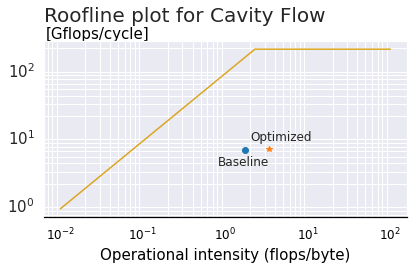

In [11]:
# Data points
kernel_name = 'Cavity Flow'
#peak performance [GFLOPS]
peak_perf = 194.35
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[1.71, 6.27, color_baseline, 'o'], 
          [3.4, 6.48, color_optimized1, '*']]

kernel_names = ['Baseline', 'Optimized']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 0.9, kernel[0][1] - 2.5), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 1.4, kernel[1][1] + 2.5), fontsize = 12)

## Roofline settings #########################################################################
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.29, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

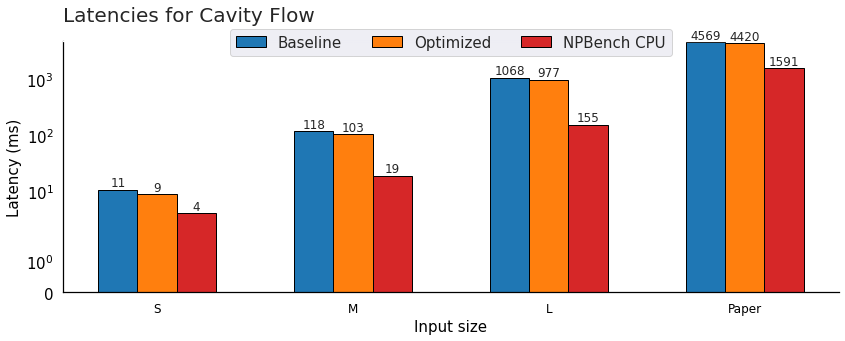

In [12]:
# Data points ####################################################################################

kernel_name = 'Cavity Flow'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([10.503,118,1068,4569])
optimized_1 = np.array([8.844,103,977,4420])
npbench_cpu = np.array([4,19,155,1591])

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.0f' % height, fontsize=12,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

## PLOT settings #########################################################################

ax1.set_title('Latencies for {}'.format(kernel_name), loc='left', pad = 20)
ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)

plt.legend(ncol = 3, loc='upper center', bbox_to_anchor=(0.5, 1.08))
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_latency.png'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


In [13]:
!pwd

/home/amanglik/dpchpc


In [14]:
# Add legends to bar plots
# Remove hatches
# Add title to bar plots
# Fix font sizes
# Add plots to presentation

# Background
What is npbench
Why are we putting FPGA implementation
We have never done HLS before -- > opportunity to learn hls

Perf model: mem bw, peak perf, how we calculate it

SyntaxError: invalid syntax (1062753059.py, line 9)